收敛在迭代次数 359


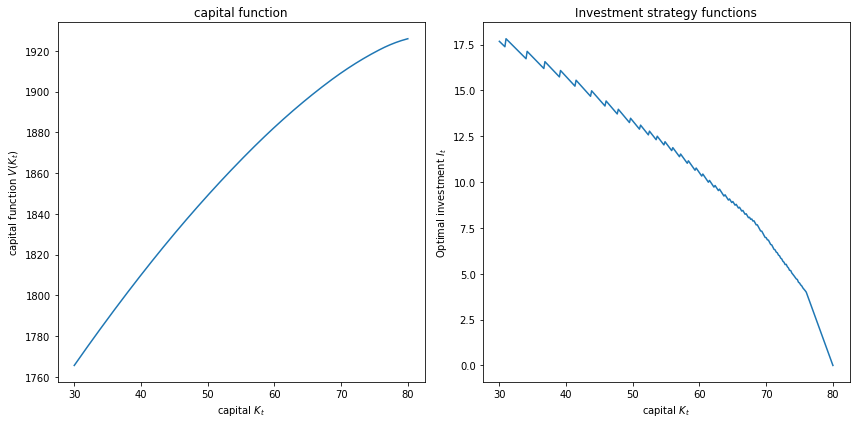

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 问题参数
beta = 0.95        # 折现因子
theta = 0.7        # 资本的产出弹性
gamma = 0.2        # 调整成本参数
p = 1.2            # 资本商品的价格
A_bar = 1.5        # 固定生产力水平

# 离散资本空间
K_min, K_max = 30, 80
num_points = 301
K = np.linspace(K_min, K_max, num_points)  # 资本的离散空间
V = np.zeros(num_points)  # 价值函数的初始值
policy = np.zeros(num_points)  # 最优投资策略的初始值

# 贝尔曼方程迭代
tolerance = 1e-6
max_iterations = 1000
for iteration in range(max_iterations):
    V_new = np.copy(V)
    for i, K_t in enumerate(K):
        max_value = -np.inf
        optimal_investment = 0
        for I_t in np.linspace(0, K_max - K_t, 100):  # 选择一组可能的投资值
            K_next = K_t + I_t
            profit = np.exp(A_bar) * K_t**theta - (gamma / 2) * I_t**2  # 利润减去成本
            value = profit + beta * np.interp(K_next, K, V)  # 当前收益加上折现的未来价值
            if value > max_value:
                max_value = value
                optimal_investment = I_t
        V_new[i] = max_value
        policy[i] = optimal_investment
    if np.max(np.abs(V_new - V)) < tolerance:
        print(f"收敛在迭代次数 {iteration}")
        break
    V = V_new

# 绘制结果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, V)
plt.xlabel('capital $K_t$')
plt.ylabel('capital function $V(K_t)$')
plt.title('capital function')

plt.subplot(1, 2, 2)
plt.plot(K, policy)
plt.xlabel('capital $K_t$')
plt.ylabel('Optimal investment $I_t$')
plt.title('Investment strategy functions')

plt.tight_layout()
plt.show()
